In [5]:
!pip install matplotlib

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("Different_stores_dataset.csv")
df

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.3800,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.4590,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.0600,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.7650,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.4500,Cash,South,Florida,Kanyon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park


### 1. Check missing values and duplicate records

In [10]:
missing_values = df.isnull().sum()
duplicate_records = df.duplicated().sum()
print("Missing Values:\n", missing_values)
print("\nDuplicate Records:", duplicate_records)

Missing Values:
 invoice_no                0
invoice_date              0
customer_id               0
gender                    0
age                       0
category                  0
quantity                  0
selling_price_per_unit    0
cost_price_per_unit       0
payment_method            0
region                    0
state                     0
shopping_mall             0
dtype: int64

Duplicate Records: 0


### 2. Add column name 'Total Sales'

In [12]:
df["Total Sales"] = df["quantity"] * df["selling_price_per_unit"]
df

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.3800,Credit Card,South,Kentucky,Kanyon,7502.00
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.4590,Debit Card,South,Kentucky,Viaport Outlet,5401.53
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.0600,Cash,West,California,Metrocity,300.08
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.7650,Credit Card,South,Florida,Metropol AVM,15004.25
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.4500,Cash,South,Florida,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon,293.25
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet,20.92
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity,20.92
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park,16800.00


### 3. How many customers have age more than 60?

In [13]:
customers_above_60 = df[df["age"] > 60]["customer_id"].nunique()
print("\nNumber of customers aged more than 60:", customers_above_60)


Number of customers aged more than 60: 17169


### 4. How many unique customer_id entries are there? Do any customers make multiple purchases?

In [14]:
unique_customers = df["customer_id"].nunique()
multiple_purchases = df[df.duplicated(subset=["customer_id"], keep=False)]["customer_id"].nunique()
print("\nUnique Customers:", unique_customers)
print("Customers with Multiple Purchases:", multiple_purchases)


Unique Customers: 99457
Customers with Multiple Purchases: 0


### 5. Are there more male or female customers, Show in Pie Chart?

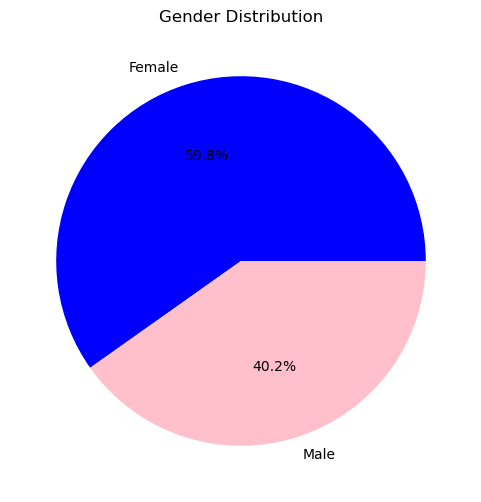

In [15]:
gender_counts = df["gender"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["blue", "pink"])
plt.title("Gender Distribution")
plt.show()

### 6. Which category is least popular among customers?

In [16]:
least_popular_category = df["category"].value_counts().idxmin()
print("\nLeast Popular Category:", least_popular_category)


Least Popular Category: Books


### 7. Which category has the highest sales volume?

In [17]:
highest_sales_category = df.groupby("category")["quantity"].sum().idxmax()
print("\nCategory with Highest Sales Volume:", highest_sales_category)


Category with Highest Sales Volume: Clothing


### 8. Add column name 'Total Profit'

Total Profit=Total Sales−Total Costs

In [20]:
df["Total Profit"] = df["Total Sales"] - (df["quantity"] * df["cost_price_per_unit"])
df


,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total Profit
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.3800,Credit Card,South,Kentucky,Kanyon,7502.00,375.1000
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.4590,Debit Card,South,Kentucky,Viaport Outlet,5401.53,540.1530
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.0600,Cash,West,California,Metrocity,300.08,5.0200
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.7650,Credit Card,South,Florida,Metropol AVM,15004.25,500.4250
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.4500,Cash,South,Florida,Kanyon,242.40,60.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon,293.25,73.3125
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet,20.92,6.2760
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity,20.92,6.2760
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park,16800.00,1680.0000


### 9. Display the top 10 invoices with the highest quantities sold?

In [21]:
top_10_invoices = df.groupby("invoice_no")["quantity"].sum().nlargest(10)
print("\nTop 10 Invoices with Highest Quantities Sold:\n", top_10_invoices)


Top 10 Invoices with Highest Quantities Sold:
 invoice_no
I283443    15
I282789    12
I293215    12
I115679    11
I160221    10
I207205    10
I353272    10
I286193     9
I139207     8
I215578     8
Name: quantity, dtype: int64


### 10. Which payment method is most commonly used?

In [22]:
top_10_invoices = df.groupby("invoice_no")["quantity"].sum().nlargest(10)
print("\nTop 10 Invoices with Highest Quantities Sold:\n", top_10_invoices)


Top 10 Invoices with Highest Quantities Sold:
 invoice_no
I283443    15
I282789    12
I293215    12
I115679    11
I160221    10
I207205    10
I353272    10
I286193     9
I139207     8
I215578     8
Name: quantity, dtype: int64


### 11. Total Sales with respect to region?

In [23]:
sales_by_region = df.groupby("region")["Total Sales"].sum()
print("\nTotal Sales by Region:\n", sales_by_region)


Total Sales by Region:
 region
Central    58803471.74
East       72280660.57
South      40655491.64
West       79825624.03
Name: Total Sales, dtype: float64


### 12. Sort Malls with average sales higher to lower?

In [24]:
malls_sorted_by_avg_sales = df.groupby("shopping_mall")["Total Sales"].mean().sort_values(ascending=False)
print("\nMalls Sorted by Average Sales:\n", malls_sorted_by_avg_sales)



Malls Sorted by Average Sales:
 shopping_mall
Zorlu Center        2573.248351
Kanyon              2550.618396
Mall of Istanbul    2543.276766
Viaport Outlet      2523.835118
Istinye Park        2523.186677
Metropol AVM        2497.777108
Metrocity           2485.030133
Name: Total Sales, dtype: float64


### 13. Sort categories with the highest profit margins display in bar plot?

Profit Margin=(Total Sales/Total Profit)×100

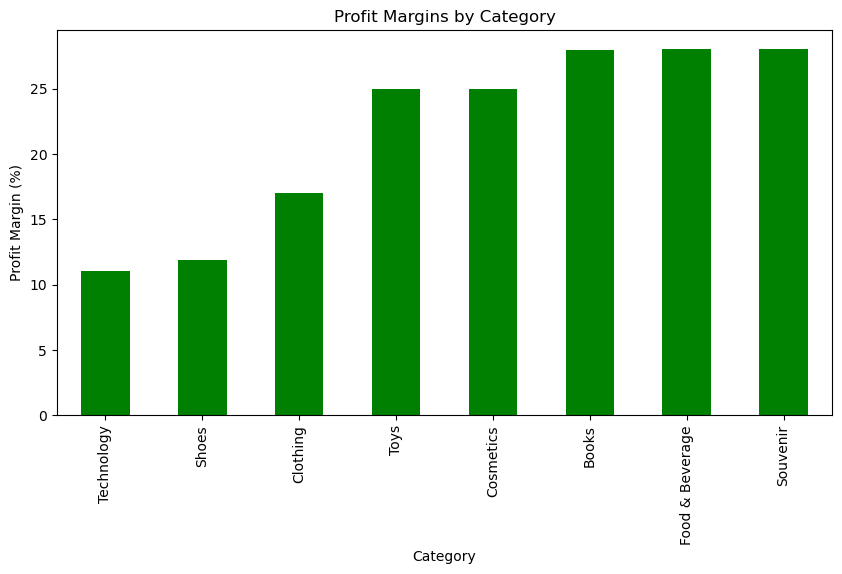

In [25]:
df["Profit Margin"] = (df["Total Profit"] / df["Total Sales"]) * 100
profit_margin_by_category = df.groupby("category")["Profit Margin"].mean().sort_values()
profit_margin_by_category.plot(kind="bar", figsize=(10,5), color="green")
plt.title("Profit Margins by Category")
plt.xlabel("Category")
plt.ylabel("Profit Margin (%)")
plt.show()

### 14.  What is the total number of transactions per region for each payment method?

In [26]:
transactions_by_region_payment = df.groupby(["region", "payment_method"])["invoice_no"].nunique()
print("\nTotal Transactions per Region for Each Payment Method:\n", transactions_by_region_payment)


Total Transactions per Region for Each Payment Method:
 region   payment_method
Central  Cash              10319
         Credit Card        8140
         Debit Card         4640
East     Cash              12738
         Credit Card        9817
         Debit Card         5751
South    Cash               7227
         Credit Card        5698
         Debit Card         3284
West     Cash              14163
         Credit Card       11276
         Debit Card         6404
Name: invoice_no, dtype: int64


### 15. How do sales in different categories compare between males and females?

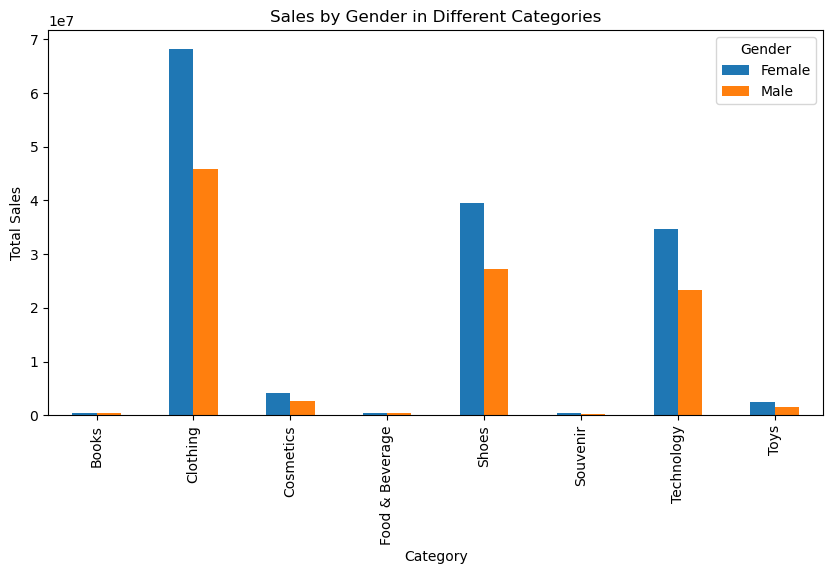

In [27]:
sales_by_gender_category = df.groupby(["category", "gender"])["Total Sales"].sum().unstack()
sales_by_gender_category.plot(kind="bar", figsize=(10,5))
plt.title("Sales by Gender in Different Categories")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.legend(title="Gender")
plt.show()